# Cross Entropy and Maximum Likelihood Estimation
<br></br>
If you have gone through any of my other walkthroughs on machine learning, particularly those on **Logistic Regression**, **Neural Networks**, **Decision Trees**, or **Bayesian machine learning** you have definitely come across the concept of **Cross Entropy** and **Maximum Likelihood Estimation**. Now, when discussed separately, these are relatively simple concepts to understand. However, during the creation of these notebooks, particularly the sections on logisitic regression and neural networks (and the cost functions involved), I felt as though it was not clear why they were related in certain cases. 

This notebook is meant to do three things:
1. Describe **Cross Entropy** in detail
2. Describe **Maximum Likelihood Estimation** in detail
3. Describe how the **Cross Entropy** can be equivalent to the negative **log-likelihood**, such as in the cost function in a neural network.

So, with that said, lets get started talking about Cross Entropy.

# 1. Cross Entropy
## 1.1 Introduction
When we develop a model for probabilistic classification, we are trying to figure out how to map the models **inputs** to **probabilistic predictions**, with the goal that these are very close to the **ground-truth probabilities**. The **training** process is done by iteratively adjusting the model's parameters so that our predictions get closer and closer to the ground-truth. 

Say we are trying to build a model that can determine whether an image contains a dog, a cat, or a fish. If, for instance, we input an image that contains a fish, we are hoping that the output is: 

$$y = \begin{bmatrix}
    0 \\
    0 \\
    1
\end{bmatrix}$$

Since that vector represents the **ground-truth class probabilities**- in this case 0 for dog, 0 for cat, and 1 for fish. If our model ended up predicting a different probability distribution, for instance:

$$\hat{y}= \begin{bmatrix}
    0.3 \\
    0.2 \\
    0.5
\end{bmatrix}$$

Then we would want to adjust our parameters so that $\hat{y}$ gets closer to $y$. The question is: What exactly do we mean when we say "get's closer to"? How should we measure the difference between $\hat{y}$ and $y$? One possible measure is **cross entropy**. 

## 1.2 Entropy 
In the context of **information theory**, what is **entropy**? Let's look at an example first. Say you are standing along a road, and you want to communicate each car model that you see pass to a friend. The only means that you have to communicate with your friend is a binary channel where you can only send 0 or 1, and each particular bit costs 10 cents. To do this, you will need bit sequences, one to represent each car model. 

Lets assume you are trying to minimize the amount of money you have to spend. How would you decide to assign bit sequences to car models? Would you use the same number of bits for a Toyota Camry as you would for a corvette? No, you wouldn't! Clearly you know that the camry is far more common, and you will be communicating to your friend that you saw a camry far more often, so you want to assign it a smaller sequence of bits. In other words, you are exploiting your knowledge about the distribution over car models to reduce the number of bits that you need to send on average. 

Well, it turns out that if you have access to the underlying distribution of cars on the road, $y$, then if you want to use the smallest number of bits on average, you should assign $log(\frac{1}{y_i})$ bits to the $i$th symbol. (Remember, $y_i$ is the probability of the $i$th symbol). 

For example, if we assume that seeing a Camry is 128 times as likely as seeing a corvette, then we'd give the Camry 7 less bits than the Tesla symbol:

$$b_{camry} = log\frac{1}{128p_{corvette}} = log\frac{1}{p_{corvette}} + log\frac{1}{128} = b_{corvette}-7$$

If we fully exploit the known distribution of cars, $y$, in this way, we can achieve an optimal number of bits per transmission. The optimal number of bits is known as **entropy**. Mathematically, it's just the expected number of bits under this optimal encoding. 

$$H(y) = \sum_iy_ilog\frac{1}{y_i} = -\sum_iy_ilog(y_i)$$

Where again, $y_i$ is the probability of seeing the $i$-th symbol, i.e. a corvette, and $log\frac{1}{y_i}$ is the number of bits we have assigned to it. So this equation just means that we take the probability of seeing each car, and multiply that by the number of bits we have assigned to it, and that is the total number of bits we would be expecting to transmit.

<br></br>
## 1.3 Cross Entropy
Now, if we think of a distribution as the tool we use to encode symbols, then entropy measure the number of bits we'll need if we use the *correct* tool, $y$, the **ground-truth probability distribution**. This is optimal, in that we can't encode the symbols using fewer bits on average. 

**However**, **cross entropy** represents the number of bits we will need if we encode symbols from $y$ using the *wrong* tool $\hat{y}$. In other words, if the probabilty distribution we our model learns, $\hat{y}$, is not the same as $y$ (which it almost never will be), then **cross entropy** represents the number of bits used in the encoding. We would have encoded the $i$th symbol with $log\frac{1}{\hat{y_i}}$ bits, instead of $log\frac{1}{y_i}$ bits. 

We of course will still be utilizing the value of the true distribution $y$, since that is the distribution we will actually encounter (if this is unclear, all it means is that you create the encoding scheme *before* you actually see the number of cars, meaning you use a distribution you are hoping is close the the correct one. We call this distribution $\hat_{y}$. However, when actually determining how many bits you use, that is based on *actual* cars that pass you, which is the true distribution, $y$.). Mathematically this looks like:

$$H(y, \hat{y}) = \sum_iy_ilog\frac{1}{\hat{y_i}} = -\sum_iy_ilog\frac{1}{\hat{y_i}}$$

**Cross entropy** is *always* larger than **entropy**. Encoding symbols according to the wrong distribution $\hat{y}$ will always make us use more bits. The only expection is in the trivial case where $y$ and $\hat{y}$ are equal, and in this case entropy and cross entropy are equal.

<br></br>
## 1.4 KL Divergence 
The **KL Divergence** from $\hat{y}$ to $y$ is simply the **difference** between **cross entropy** and **entropy**:

$$KL(y \;||\; \hat{y}) = \sum_iy_ilog\frac{1}{\hat{y_i}} - \sum_iy_ilog\frac{1}{y_i} = \sum_iy_ilog\frac{y_i}{\hat{y_i}}$$

It measures the extra bits we'll need on average if we encode symbols from $y$ according to $\hat{y}$. It is never negative, and it is only 0 if $y$ and $\hat{y}$ are the same. Note that minimizing the **cross entropy** and minimizing the **KL divergence** from $y$ to $\hat{y}$ are the same thing. 

# 2. Maximum Likelihood
## 2.1 Introduction 
One thing that we try and do during machine learning is maximize the likelihood of our data, given our particular model. This really means that we are trying to say: "How likely is it that we received these outputs, given our model is true". As an example, say we have trained a model to predict whether an image is of a cat or a dog. Now lets say we run predictions on 3 images of dogs, but our model predicts they are all cats. In that case our data was 3 images of dogs, and our model got all predictions wrong. So we could that, if our model was in fact correct, the likelihood of our input data really be 3 dogs is very low. Our goal is to find a model that **maximizes the likelihood**. So we would want a model that predicts all 3 images are dogs. 

<br></br>
## 2.2 Coin Toss Example
Let's look at an example where try and calculate the likelihood for a biased coin. Say we have a coin with a probability of heads, $p(H)$, equal to $p$:
$$p(H) = p$$
In this case, $p$ is a parameter. The probability of tails (since this is a bernoulli trial), is:
$$p(T) = 1 - p$$
Now we are going to run an experiment to help us determine $p$. We flip a coin 10 times and we get 7 heads and 3 tails. We want to know how we would write the total likelihood, which is the probability of receiving the data (result) that we saw. The general form equation for the likelihood in a binomial experiment is:

$$L(X\;|\;p) = p^k(1-p)^{N-k}$$

In this case $k$ is the total number of success's, $N$ is the total number of trials. In our example, we had 7 heads, so 7 success's, and 3 tails, so 3 failures, with 10 trials total. Our likelihood function then looks like:

$$L(X\;|\;p) = p^7(1-p)^3$$

Note that we are able to do this because each coin toss is independent. Therefore we can multiply each probability! In other words the above equation came from multiplying each probability of each result together:

$$p*p*p*p*p*p*p*(1-p)*(1-p)*(1-p)$$

Also, the likelihood can look just like a conditional probability. This is because the likelihood is used when our data, in this case $X$, has already been observed. 

Now, we want to **maximize the likelihood**. In other words, we want to maximize $L$ with respect to $p$, our parameter. This means we want to choose a $p$ that maximizes $L$. This can be done using basic calculus. Note that in most of these problems we take the log and maximize the likelihood. This is acceptable because the log function is monotonically increasing. 

Before we perform the maximizingof our likelihood, lets get a quick idea of what our Likelihood function actually looks like:

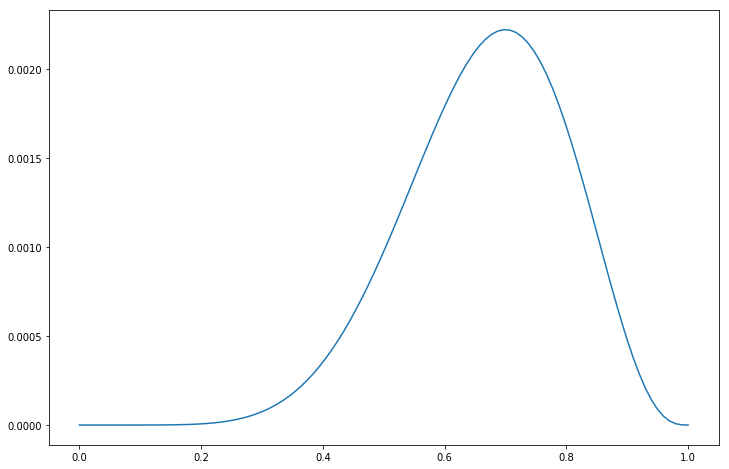

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,8))
x = np.linspace(0, 1, 100)
y = np.power(x, 7)*np.power(1-x,3)
plt.plot(x, y)
plt.show()

Okay great, we can see that from a visual perspective we should be expecting a value of ~0.7 to be the value of $p$ that maximizes the likelihood of observing our data!

Lets now go through the derivation. First we will take the log of the likelihood:
$$log(L) = l = log\Big(p^7*(1-p)^3\Big)$$
Then use the multiplication rule:
$$log(p^7) + log\Big((1-p)^3\Big)$$
Then the power rule:
$$7log(p) + 3log(1-p)$$
Set the derivative equal to zero:
$$\frac{dl}{dp} = \frac{7}{p}+\Big(-1*\frac{3}{1-p}\Big)= 0$$
And solve for p:
$$\frac{7}{p} = \frac{3}{1-p}$$
$$\frac{1-p}{p} = \frac{3}{7}$$
$$\frac{1}{p} -1 = \frac{3}{7}$$
$$\frac{1}{p} = \frac{10}{7}$$
$$p = \frac{7}{10}$$
This is what we would expect (visually it agrees)! If this is still slightly abstract, here is a visualization of exactly what is going on:

<img src="images/mle.gif">

We already have observed our data $X$, and we slowly change our parameter (in the visual above the parameter is now $\mu$, but it can be thought of as $p$. As we change the parameter, we can see that our probability distribution moves to the right. Once we find the parameter that maximizes the likelihood, we can see that the distribution on the left also is in the best place it can be.

<br></br>
## 2. Predictive Power
At this point, you may be happy to just use the cross entropy to measure the difference between two distributions, $y$ and $\hat{y}$, and then using the total cross entropy over all training examples as our loss function. In particular, if we let $n$ index our training examples, the overal loss would be:

$$H(\{y^{(n)}\}, \{\hat{y}^{(n)}\}) = \sum_nH(y^{(n)}, \hat{y}^{(n)})$$

But let's look at another approach. What if we want our objective function to be a direct measure of our model's predictive power (at least with respect to our training data)? One common approach is to tune our parameters so that the **likelihood** of our data under the model is **maximized**. When performing **classification** we are often using a *discriminative model*, our "data" often just consists of the labels we are trying to predict. We can reason that a model that often predicts the ground-truth labels given the inputs might be useful, while a model that fails to predict the ground-truth labels is not useful. 

Because we generally assume that our samples are **independent and identically distributed**, the likelihood over all of our examples decomposes into a product over the likelihoods of individual examples:

$$L(\{y^{(n)}\}, \{\hat{y}^{(n)}\}) = \prod_nL(y^{(n)}, \hat{y}^{(n)})$$

And what is the likelihood of the $n$th example? It is just the particular entroy of $\hat{y}^{(n)}$ that corresponds to the ground truth label specified by $y^{(n)}$! 

If we go back to our original example, if the first training image is of a fish, then:

$$y^{(1)} = \begin{bmatrix}
    0 \\
    0 \\
    1
\end{bmatrix}$$

This tells us that the likelihood $L(y^{(1)}, \hat{y}^{(1)})$ is just the last entry of:

$$\hat{y}= \begin{bmatrix}
    0.3 \\
    0.2 \\
    0.5
\end{bmatrix}$$

Which is $y^{(1)} = 0.5$. Now lets that we have 4 training images labeled: *fish, cat, dog, cat*. This gives us our ground truth distribution: 
$$y^{(1)} = \begin{bmatrix}
    0 \\
    0 \\
    1
\end{bmatrix}$$
$$y^{(2)} = \begin{bmatrix}
    0 \\
    1 \\
    0
\end{bmatrix}$$
$$y^{(3)} = \begin{bmatrix}
    1 \\
    0 \\
    0
\end{bmatrix}$$
$$y^{(4)} = \begin{bmatrix}
    0 \\
    1 \\
    0
\end{bmatrix}$$

Our model would predict 4 other distributions: 

$$\hat{y}^{(1)},\hat{y}^{(2)},\hat{y}^{(3)},\hat{y}^{(4)}$$

And our overall likelihood would just be: 

$$L(\{ y^{(1)},y^{(2)},y^{(3)},y^{(4)}\}, \{\hat{y}^{(1)},\hat{y}^{(2)},\hat{y}^{(3)},\hat{y}^{(4)} \}) = \hat{y}^{(1)}\hat{y}^{(2)}\hat{y}^{(3)}\hat{y}^{(4)}$$

Maybe we would have been previously happy with just minimizing the cross entropy during training, but after seeing this, are we still happy? Why shouldn't we instead maximize the likelihood of our data? 

# 3. Unified Loss Function
Let's take a minute to play with the expression above. Because a logarithm is monotonic, we know that maximizing the likelihood is equivalent to maximizing the **log likelihood**, which is in turn equivalent to *minimizing* the **negative log likelihood**. 

$$-log\Big(L(\{y^{(n)}\}, \{\hat{y}^{(n)}\})\Big)= - \sum_nlog\Big(L(y^{(n)}, \hat{y}^{(n)})\Big)$$

But, from the work we did earlier, we also know that the log likelihood of $y^{(n)}$ is just the log of a particular entry of $\hat{y}^{(n)}$. In fact, its the entry $i$ that satisfies $y_i^{(n)} = 1$. We can therefore rewrite the log likelihood for the nth training example in the following way: 

$$ \log L(y^{(n)}, \hat{y}^{(n)}) = \sum_i y^{(n)}_i \log \hat{y}^{(n)}_i $$

Which in turn gives us an overall negative log likelihood of: 

$$ - \log L(\{y^{(n)}\}, \{\hat{y}^{(n)}\}) = -\sum_n \sum_i y^{(n)}_i \log \hat{y}^{(n)}_i $$

Does this look familiar? This is exactly the **cross entropy**, summed over all training examples: 

$$ -\log L(\{y^{(n)}\}, \{\hat{y}^{(n)}\}) = \sum_n \big[-\sum_i y_i \log \hat{y}^{(n)}_i\big] = \sum_n H(y^{(n)}, \hat{y}^{(n)})$$

# 4. Conclusions

When we develop a probabilistic model over mutually exclusive classes, we need a way to measure the difference between predicted probabilities $\hat{y}$ and ground-truth probabilities $y$, and during training we try to tune parameters so that this difference is minimized.In this post we saw that cross entropy is a reasonable choice.

From one perspective, minimizing cross entropy lets us find a $\hat{y}$ that requires as few extra bits as possible when we try to encode symbols from $y$ using $\hat{y}$.

From another perspective, minimizing cross entropy is equivalent to minimizing the negative log likelihood of our data, which is a direct measure of the predictive power of our model.